<a href="https://colab.research.google.com/github/meetAmarAtGithub/Capstone/blob/main/CarDamageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone"

/content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone


In [ ]:
ROOT_DIR = "/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone"

#Install Ultralytics

In [ ]:
!pip install ultralytics  > /dev/null 2>&1;

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/107.7 GB disk)


In [ ]:
# prompt: list all files in current directory

import os

for filename in os.listdir(ROOT_DIR):
  print(filename)


0642.JPEG
data
runs
TrainYolov8CustomDataset
yolov8n.pt
google_colab_config.yaml
CarDamageDetection.ipynb


# Albumentation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import albumentations as A
import cv2
import os

# Define the path for the images and labels folder
image_folder = '/content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images'
label_folder = '/content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels'

In [ ]:
'''
# Function to load labels from a txt file
def load_label_function(label_path):
    # Sample implementation: Read label data from a txt file
    with open(label_path, 'r') as file:
        label_data = file.read()
        # Process label data as per your label format
        # Return the loaded label data
        return label_data

# Function to save labels to a txt file
def save_label_function(label_path, bboxes, class_labels):
    # Sample implementation: Save label data to a txt file
    with open(label_path, 'w') as file:
        # Process bboxes and class_labels to the required format for saving
        # Write the processed label data to the file
        file.write("Processed label data to be saved")

# Apply transformations to the images and save the transformed images with corresponding labels
def apply_transformations_and_save(image_folder, label_folder):
    transform = A.Compose([
        A.RandomCrop(width=450, height=450),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['Classes']))

    for image_name in os.listdir(image_folder):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(image_folder, image_name)
            label_path = os.path.join(label_folder, image_name.replace('.jpg', '.txt'))

            original_image = cv2.imread(image_path)
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            original_label = load_label_function(label_path)

            transformed = transform(image=original_image, bboxes=original_label['bboxes'], class_labels=original_label['Classes'])
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_class_labels = transformed['Classes']

            # Save the transformed image
            transformed_image_path = os.path.join(image_folder, 'transformed_' + image_name)
            cv2.imwrite(transformed_image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

            # Save the corresponding label as a txt file
            transformed_label_path = os.path.join(label_folder, 'transformed_' + image_name.replace('.jpg', '.txt'))
            save_label_function(transformed_label_path, transformed_bboxes, transformed_class_labels)

# Example usage
apply_transformations_and_save(image_folder, label_folder)
'''

In [ ]:
# Function to load labels from a txt file
def load_label_function(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        class_labels = []
        bboxes = []

        for line in lines:
            data = line.split(' ')
            class_label = int(data[0])  # Assuming the class label is an integer
            x_min = float(data[1])
            y_min = float(data[2])
            x_max = float(data[3])
            y_max = float(data[4])
            class_labels.append(class_label)
            bboxes.append([x_min, y_min, x_max, y_max])

        return {'bboxes': bboxes, 'class_labels': class_labels}

# Apply transformations to the images and save the transformed images with corresponding labels
def apply_transformations_and_save(image_folder, label_folder, transform, transformation_name):
    transformed_image_folder = os.path.join(image_folder, f"transformed_{transformation_name}_images")
    transformed_label_folder = os.path.join(label_folder, f"transformed_{transformation_name}_labels")
    os.makedirs(transformed_image_folder, exist_ok=True)
    os.makedirs(transformed_label_folder, exist_ok=True)

    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpeg','.JPEG')):
            image_path = os.path.join(image_folder, image_name)
            label_path = os.path.join(label_folder, os.path.splitext(image_name)[0] + '.txt')

            if not os.path.exists(label_path):
                print(f"No label file found for image {image_name}. Skipping transformation.")
                continue

            # Check if transformed image already exists, then skip the transformatin
            transformed_image_path = os.path.join(transformed_image_folder, f"{transformation_name}" + image_name)
            if os.path.exists(transformed_image_path):
                print(f"Transformed image already exists for {image_name}. Skipping transformation.")
                continue

            original_image = cv2.imread(image_path)
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            #print('label_path ', label_path)
            original_label = load_label_function(label_path)
            #print('original_label ', original_label)

            # Normalize bounding box coordinates to the range [0.0, 1.0]
            normalized_bboxes = []
            for bbox in original_label['bboxes']:
                x_min = max(min(bbox[0], 1.0), 0.0)  # x_min
                y_min = max(min(bbox[1], 1.0), 0.0)  # y_min
                x_max = max(min(bbox[2], 1.0), 0.0)  # x_max
                y_max = max(min(bbox[3], 1.0), 0.0)  # y_max
                normalized_bboxes.append([x_min, y_min, x_max, y_max])

            original_label['bboxes'] = normalized_bboxes

            print('original_label - ', original_label)
            #print('image_name - ', image_name)
            try:
              transformed = transform(image=original_image, bboxes=original_label['bboxes'], Classes=original_label['class_labels'])
              transformed_image = transformed['image']
              transformed_bboxes = transformed['bboxes']
              print('transformed_bboxes - ' , transformed_bboxes)
              transformed_class_labels = transformed['Classes']

              # Save the transformed image
              transformed_image_path = os.path.join(transformed_image_path)
              cv2.imwrite(transformed_image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

              # Save the corresponding label as a txt file
              transformed_label_name = os.path.splitext(image_name)[0] + '.txt'
              transformed_label_path = os.path.join(transformed_label_folder, f"{transformation_name}" + f"{transformed_label_name}")
              if os.path.exists(transformed_label_path):
                print(f"Transformed label already exists for {transformed_label_name}. Skipping transformation.")
                continue
              else:
                with open(transformed_label_path, 'w') as file:
                    for i in range(len(transformed_bboxes)):
                        bbox = transformed_bboxes[i]
                        class_label = transformed_class_labels[i]
                        file.write(f"{class_label} {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}\n")
            except ValueError as e:
                  print(f"Error processing image {image_name}: {e}. Skipping transformation.")
                  continue

In [ ]:
transform = A.Compose([
        #A.RandomCrop(width=150, height=150),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['Classes']))

# Example usage
apply_transformations_and_save(image_folder, label_folder, transform, 'HorizontalFlip_')

original_label -  {'bboxes': [[0.632172, 0.430851, 0.563521, 0.249255], [0.56294, 0.573511, 0.272772, 0.252234], [0.603633, 0.797979, 0.368989, 0.307766]], 'class_labels': [6, 10, 0]}
transformed_bboxes -  [(0.36782800000000004, 0.430851, 0.5635210000000002, 0.249255), (0.43706, 0.5735109999999999, 0.272772, 0.25223399999999996), (0.396367, 0.797979, 0.368989, 0.307766)]
original_label -  {'bboxes': [[0.864402, 0.696701, 0.18332, 0.165155], [0.691776, 0.409897, 0.533127, 0.270309]], 'class_labels': [0, 6]}
transformed_bboxes -  [(0.8644020000000001, 0.696701, 0.18332000000000004, 0.16515499999999994), (0.691776, 0.409897, 0.5331269999999999, 0.270309)]
original_label -  {'bboxes': [[0.42917, 0.412887, 0.203591, 0.138144], [0.505077, 0.285284, 0.546602, 0.150155], [0.315, 0.457964, 0.202432, 0.31232]], 'class_labels': [10, 6, 3]}
transformed_bboxes -  [(0.42917, 0.412887, 0.20359099999999997, 0.138144), (0.505077, 0.285284, 0.546602, 0.15015500000000004), (0.315, 0.4579639999999999, 0.2

In [ ]:
transform = A.Compose([
        #A.RandomCrop(width=150, height=150),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['Classes']))

# Example usage
apply_transformations_and_save(image_folder, label_folder, transform, 'VerticalFlip_')

original_label -  {'bboxes': [[0.632172, 0.430851, 0.563521, 0.249255], [0.56294, 0.573511, 0.272772, 0.252234], [0.603633, 0.797979, 0.368989, 0.307766]], 'class_labels': [6, 10, 0]}
transformed_bboxes -  [(0.632172, 0.430851, 0.5635210000000002, 0.249255), (0.56294, 0.5735109999999999, 0.272772, 0.25223399999999996), (0.603633, 0.797979, 0.368989, 0.307766)]
original_label -  {'bboxes': [[0.864402, 0.696701, 0.18332, 0.165155], [0.691776, 0.409897, 0.533127, 0.270309]], 'class_labels': [0, 6]}
transformed_bboxes -  [(0.8644020000000001, 0.696701, 0.18332000000000004, 0.16515499999999994), (0.691776, 0.409897, 0.5331269999999999, 0.270309)]
original_label -  {'bboxes': [[0.42917, 0.412887, 0.203591, 0.138144], [0.505077, 0.285284, 0.546602, 0.150155], [0.315, 0.457964, 0.202432, 0.31232]], 'class_labels': [10, 6, 3]}
transformed_bboxes -  [(0.42917, 0.587113, 0.20359099999999997, 0.13814400000000004), (0.505077, 0.714716, 0.546602, 0.15015500000000004), (0.315, 0.5420360000000001, 0.2

In [ ]:
transform = A.Compose([
        A.Rotate(limit=(-90, 90), p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['Classes']))

# Example usage
apply_transformations_and_save(image_folder, label_folder, transform, 'Rotate_')

original_label -  {'bboxes': [[0.632172, 0.430851, 0.563521, 0.249255], [0.56294, 0.573511, 0.272772, 0.252234], [0.603633, 0.797979, 0.368989, 0.307766]], 'class_labels': [6, 10, 0]}
transformed_bboxes -  [(0.632172, 0.430851, 0.5635210000000002, 0.249255), (0.56294, 0.5735109999999999, 0.272772, 0.25223399999999996), (0.603633, 0.797979, 0.368989, 0.307766)]
original_label -  {'bboxes': [[0.864402, 0.696701, 0.18332, 0.165155], [0.691776, 0.409897, 0.533127, 0.270309]], 'class_labels': [0, 6]}
transformed_bboxes -  [(0.8644020000000001, 0.696701, 0.18332000000000004, 0.16515499999999994), (0.691776, 0.409897, 0.5331269999999999, 0.270309)]
original_label -  {'bboxes': [[0.42917, 0.412887, 0.203591, 0.138144], [0.505077, 0.285284, 0.546602, 0.150155], [0.315, 0.457964, 0.202432, 0.31232]], 'class_labels': [10, 6, 3]}
transformed_bboxes -  [(0.4378859438778834, 0.4017454477033443, 0.21493278811414052, 0.17105002922059181), (0.5251496936338724, 0.287817188001782, 0.5563761668623993, 0.2

In [ ]:
transform = A.Compose([
        A.ToGray(p=0.7),
        #A.RandomBrightnessContrast(p=0.5),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['Classes']))

# Example usage
apply_transformations_and_save(image_folder, label_folder, transform, 'Gray_')

original_label -  {'bboxes': [[0.632172, 0.430851, 0.563521, 0.249255], [0.56294, 0.573511, 0.272772, 0.252234], [0.603633, 0.797979, 0.368989, 0.307766]], 'class_labels': [6, 10, 0]}
transformed_bboxes -  [(0.632172, 0.430851, 0.5635210000000002, 0.249255), (0.56294, 0.5735109999999999, 0.272772, 0.25223399999999996), (0.603633, 0.797979, 0.368989, 0.307766)]
original_label -  {'bboxes': [[0.864402, 0.696701, 0.18332, 0.165155], [0.691776, 0.409897, 0.533127, 0.270309]], 'class_labels': [0, 6]}
transformed_bboxes -  [(0.8644020000000001, 0.696701, 0.18332000000000004, 0.16515499999999994), (0.691776, 0.409897, 0.5331269999999999, 0.270309)]
original_label -  {'bboxes': [[0.42917, 0.412887, 0.203591, 0.138144], [0.505077, 0.285284, 0.546602, 0.150155], [0.315, 0.457964, 0.202432, 0.31232]], 'class_labels': [10, 6, 3]}
transformed_bboxes -  [(0.42917, 0.412887, 0.20359099999999997, 0.138144), (0.505077, 0.285284, 0.546602, 0.15015500000000004), (0.315, 0.4579639999999999, 0.202432000000

### Following code is to delete any unneceaary files & folders

In [ ]:
import os

def delete_files_with_prefix(folder_path, prefixes):
    for file_name in os.listdir(folder_path):
        for prefix in prefixes:
            if file_name.startswith(prefix):
                file_path = os.path.join(folder_path, file_name)
                os.remove(file_path)
                print(f"Deleted file: {file_path}")

# Example usage
prefixes_to_delete = ["HorizontalFlip_", "VerticalFlip_", "Rotate_"]

In [ ]:
delete_files_with_prefix(image_folder, prefixes_to_delete)

In [ ]:
delete_files_with_prefix(label_folder, prefixes_to_delete)

## Move images from subfolder to main folder

In [ ]:
import os
import shutil

def move_images_from_subdirectories(source_folder, destination_folder):
    for root, _, files in os.walk(source_folder):
        for file_name in files:
            if file_name.endswith(('.jpeg','.JPEG', '.txt')):
                source_file_path = os.path.join(root, file_name)
                destination_file_path = os.path.join(destination_folder, file_name)
                if not os.path.exists(destination_file_path):
                    shutil.move(source_file_path, destination_folder)
                    print(f"Moved file: {source_file_path} to {destination_file_path}")
                else:
                    print(f"File already exists: {destination_file_path}. Skipping.")
            else:
                print(f"Skipping file: {file_name}")

def delete_empty_subdirectories(folder):
    # Traverse all subdirectories in reverse order to ensure deleting empty parents first
    for root, dirs, files in os.walk(folder, topdown=False):
        for directory in dirs:
            directory_path = os.path.join(root, directory)
            # Check if the directory is empty
            if not os.listdir(directory_path):
                # Delete the empty directory
                os.rmdir(directory_path)
                print(f"Deleted empty directory: {directory_path}")

In [ ]:
# Example usage
move_images_from_subdirectories(image_folder, image_folder)
delete_empty_subdirectories(image_folder)

File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0882.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0883.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0759.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0857.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0425.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0429.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0495.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0593.JPEG. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/images/0520.JPEG. Skipping.
File already exists: /conten

In [ ]:
# Example usage
move_images_from_subdirectories(label_folder, label_folder)
delete_empty_subdirectories(label_folder)

File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0362.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0044.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0169.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0305.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0163.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0384.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0186.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0495.txt. Skipping.
File already exists: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/labels/0304.txt. Skipping.
File already exists: /content/gdrive/

### Move images and labels to tran and val folders

In [ ]:
import os
import shutil
import random

# Define paths
data_folder = '/content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data'
train_folder = os.path.join(data_folder, 'train')
val_folder = os.path.join(data_folder, 'val')
train_images_folder = os.path.join(train_folder, 'images')
train_labels_folder = os.path.join(train_folder, 'labels')
val_images_folder = os.path.join(val_folder, 'images')
val_labels_folder = os.path.join(val_folder, 'labels')

# Create folders if they don't exist
for folder in [train_folder, val_folder, train_images_folder, train_labels_folder, val_images_folder, val_labels_folder]:
    os.makedirs(folder, exist_ok=True)

# Get all image and label files
image_files = [file for file in os.listdir(image_folder) if file.endswith(('.jpeg', '.JPEG'))]
label_files = [file for file in os.listdir(label_folder) if file.endswith('.txt')]

# Shuffle the files
random.shuffle(image_files)
random.shuffle(label_files)

# Calculate the split ratio (70:30)
total_files = len(image_files)
train_size = int(0.7 * total_files)
val_size = total_files - train_size

# Move files to train folders
for i in range(train_size):
    image_file = image_files[i]
    label_file = image_file.replace('.jpeg', '.txt').replace('.JPEG', '.txt')
    shutil.move(os.path.join(image_folder, image_file), os.path.join(train_images_folder, image_file))
    shutil.move(os.path.join(label_folder, label_file), os.path.join(train_labels_folder, label_file))

# Move files to val folders
for i in range(train_size, total_files):
    image_file = image_files[i]
    label_file = image_file.replace('.jpeg', '.txt').replace('.JPEG', '.txt')
    shutil.move(os.path.join(image_folder, image_file), os.path.join(val_images_folder, image_file))
    shutil.move(os.path.join(label_folder, label_file), os.path.join(val_labels_folder, label_file))

print("Files moved successfully!")


Files moved successfully!


#Model Training

In [ ]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=10)  # train the model

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/google_colab_config.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 95.8MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/train/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:59<00:00,  3.11it/s]


train: New cache created: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/val/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:45<00:00,  1.75it/s]

val: New cache created: /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.415      5.258      4.311         26        640: 100%|██████████| 12/12 [02:53<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.32s/it]

                   all         80        160   0.000676      0.131    0.00186    0.00055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.484      5.236      4.272         15        640: 100%|██████████| 12/12 [02:46<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  7.00s/it]

                   all         80        160    0.00167      0.254    0.00446    0.00139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.344       5.05      4.254         16        640: 100%|██████████| 12/12 [02:40<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.71s/it]

                   all         80        160    0.00132      0.253    0.00931    0.00266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.337      5.048      4.193         18        640: 100%|██████████| 12/12 [02:40<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.80s/it]

                   all         80        160    0.00174      0.361    0.00826    0.00235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.274      4.981      4.132         20        640: 100%|██████████| 12/12 [02:43<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.67s/it]

                   all         80        160    0.00195      0.317    0.00937    0.00299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.213      4.839      4.094         24        640: 100%|██████████| 12/12 [02:35<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.42s/it]

                   all         80        160    0.00216      0.296    0.00313   0.000961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.134      4.783      4.054         27        640: 100%|██████████| 12/12 [02:35<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.90s/it]

                   all         80        160    0.00188      0.365     0.0128    0.00217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.009       4.73      4.002         23        640: 100%|██████████| 12/12 [02:34<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.54s/it]

                   all         80        160    0.00174      0.364    0.00514    0.00133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.072       4.75      3.944         20        640: 100%|██████████| 12/12 [02:48<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.82s/it]

                   all         80        160    0.00182      0.323    0.00413    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.996      4.663      3.954         24        640: 100%|██████████| 12/12 [02:38<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.56s/it]

                   all         80        160    0.00214      0.253    0.00335   0.000975



10 epochs completed in 0.511 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.29s/it]


                   all         80        160    0.00191      0.304    0.00921    0.00285
 {0: 'BUMPER DAMAGES'}         80         15     0.0025      0.133     0.0026   0.000411
 {4: 'FENDER BENDERS'}         80         12          0          0          0          0
{5: 'CRACKED WINDSHIELDS'}         80         26    0.00408      0.769     0.0509     0.0169
{6: 'SUSPENSION DAMAGE'}         80          3          0          0          0          0
   {7: 'HOOD DAMAGES'}         80         51     0.0043      0.431    0.00976    0.00199
{8: 'WEATHER DAMAGES'}         80         15    0.00346      0.933    0.00977    0.00333
{9: 'WINDOW GLASS DAMAGES'}         80          6   0.000907      0.167   0.000643   0.000188
{11: 'HEADLIGHT DAMAGES'}         80         32          0          0          0          0
Speed: 3.6ms preprocess, 198.9ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/train


In [ ]:
import os
from ultralytics import YOLO

# Load a pretrained model
model = YOLO("yolov8n.pt")

ROOT_DIR = "/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone"

# Train the model with more epochs and a lower learning rate
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=50, lr0=0.001)

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/google_colab_config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/train/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/Colab Notebooks/Reva/Capstone/data/val/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.555      4.168      1.805         33        640: 100%|██████████| 12/12 [03:05<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:46<00:00, 15.43s/it]

                   all         80        160    0.00664      0.619     0.0654     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.356      3.848       1.63         46        640: 100%|██████████| 12/12 [02:55<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.40s/it]

                   all         80        160    0.00761      0.719      0.103     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.282      3.371       1.57         46        640: 100%|██████████| 12/12 [02:55<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  7.00s/it]

                   all         80        160      0.015       0.76      0.159      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.302       2.93      1.591         51        640: 100%|██████████| 12/12 [02:51<00:00, 14.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.46s/it]

                   all         80        160     0.0314      0.706      0.252      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.317      2.695      1.585         38        640: 100%|██████████| 12/12 [02:52<00:00, 14.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.02s/it]

                   all         80        160      0.776      0.249       0.35      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.262      2.525      1.575         30        640: 100%|██████████| 12/12 [02:58<00:00, 14.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.38s/it]

                   all         80        160      0.703      0.361      0.367       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.233      2.251      1.516         48        640: 100%|██████████| 12/12 [02:50<00:00, 14.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.39s/it]

                   all         80        160      0.753      0.407       0.44      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.26      2.113      1.509         58        640: 100%|██████████| 12/12 [02:48<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.35s/it]

                   all         80        160      0.821      0.284      0.433      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.115      1.966       1.42         39        640: 100%|██████████| 12/12 [02:53<00:00, 14.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.03s/it]

                   all         80        160      0.924       0.32      0.531      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.115      1.912      1.398         43        640: 100%|██████████| 12/12 [02:53<00:00, 14.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.45s/it]

                   all         80        160      0.777      0.401      0.594      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.103      1.793        1.4         47        640: 100%|██████████| 12/12 [02:48<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.83s/it]

                   all         80        160      0.547      0.693       0.68       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.02      1.645       1.33         43        640: 100%|██████████| 12/12 [02:54<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.07s/it]

                   all         80        160      0.727      0.598      0.676      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.02      1.662      1.332         42        640: 100%|██████████| 12/12 [02:58<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.88s/it]

                   all         80        160      0.857      0.579      0.665      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.021      1.559      1.301         44        640: 100%|██████████| 12/12 [02:58<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.68s/it]

                   all         80        160      0.802      0.606      0.696       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.073      1.608      1.373         38        640: 100%|██████████| 12/12 [02:50<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.21s/it]

                   all         80        160      0.848      0.617      0.768      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.9455      1.479      1.267         51        640: 100%|██████████| 12/12 [02:54<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.23s/it]

                   all         80        160      0.823      0.669      0.758      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.9036      1.359      1.229         36        640: 100%|██████████| 12/12 [02:52<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.24s/it]

                   all         80        160      0.734      0.695      0.784      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9068      1.304      1.238         62        640: 100%|██████████| 12/12 [02:52<00:00, 14.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.04s/it]

                   all         80        160      0.774      0.765       0.82      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9018      1.287      1.244         45        640: 100%|██████████| 12/12 [02:49<00:00, 14.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.90s/it]

                   all         80        160      0.762      0.799      0.839      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9257      1.263      1.261         54        640: 100%|██████████| 12/12 [02:53<00:00, 14.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.92s/it]

                   all         80        160      0.815      0.822       0.87      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      0.874      1.233      1.217         52        640: 100%|██████████| 12/12 [02:52<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.35s/it]

                   all         80        160      0.894      0.783      0.869      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8646       1.22      1.189         48        640: 100%|██████████| 12/12 [02:55<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.53s/it]

                   all         80        160      0.826      0.821      0.872      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.8324      1.178      1.192         55        640: 100%|██████████| 12/12 [02:56<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.89s/it]

                   all         80        160       0.88      0.864       0.91      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.7893      1.111      1.172         47        640: 100%|██████████| 12/12 [02:50<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.42s/it]

                   all         80        160      0.813      0.836      0.908      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8164      1.147      1.182         39        640: 100%|██████████| 12/12 [02:48<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.95s/it]

                   all         80        160      0.915      0.803      0.906      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7776      1.076      1.162         34        640: 100%|██████████| 12/12 [02:51<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.16s/it]

                   all         80        160      0.931      0.835      0.915      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7569      1.057      1.136         36        640: 100%|██████████| 12/12 [02:56<00:00, 14.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.09s/it]

                   all         80        160      0.916      0.885       0.91       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7198      0.992      1.117         50        640: 100%|██████████| 12/12 [02:49<00:00, 14.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.43s/it]

                   all         80        160      0.922      0.866      0.911      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.7603      1.039      1.141         55        640: 100%|██████████| 12/12 [02:51<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.76s/it]

                   all         80        160      0.904      0.881      0.915      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7124      0.953      1.101         51        640: 100%|██████████| 12/12 [02:50<00:00, 14.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.37s/it]

                   all         80        160      0.888      0.867      0.907      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7252     0.9878      1.124         63        640: 100%|██████████| 12/12 [02:56<00:00, 14.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.63s/it]

                   all         80        160      0.845      0.872      0.903      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6964     0.9281      1.071         57        640: 100%|██████████| 12/12 [03:02<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.65s/it]

                   all         80        160      0.854      0.879      0.913      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.6871     0.9265      1.093         53        640: 100%|██████████| 12/12 [02:58<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.71s/it]

                   all         80        160      0.906      0.856      0.906      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.7015     0.9344      1.082         45        640: 100%|██████████| 12/12 [02:58<00:00, 14.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.48s/it]

                   all         80        160      0.896      0.887      0.926      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6899     0.9397      1.101         41        640: 100%|██████████| 12/12 [02:50<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.52s/it]

                   all         80        160      0.904      0.913      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6658     0.9308      1.089         32        640: 100%|██████████| 12/12 [02:51<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.71s/it]

                   all         80        160      0.979      0.863      0.933      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6519     0.9082      1.081         38        640: 100%|██████████| 12/12 [02:52<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.69s/it]

                   all         80        160      0.958      0.869      0.929      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6478     0.8879      1.067         45        640: 100%|██████████| 12/12 [02:54<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.84s/it]

                   all         80        160       0.96      0.873      0.934      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6161     0.8594      1.048         54        640: 100%|██████████| 12/12 [02:56<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.74s/it]

                   all         80        160       0.96      0.864      0.935      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6133     0.8705      1.057         36        640: 100%|██████████| 12/12 [02:50<00:00, 14.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.74s/it]

                   all         80        160      0.912      0.889      0.934      0.827


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.6107      1.067       1.08         20        640: 100%|██████████| 12/12 [02:53<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.11s/it]

                   all         80        160      0.964      0.821      0.932       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5626      1.057      1.042         22        640: 100%|██████████| 12/12 [02:50<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.57s/it]

                   all         80        160      0.867      0.896       0.93       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5619      1.056      1.058         20        640: 100%|██████████| 12/12 [02:46<00:00, 13.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.62s/it]

                   all         80        160      0.943      0.881      0.936       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5248     0.9334      1.005         22        640: 100%|██████████| 12/12 [02:49<00:00, 14.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.75s/it]

                   all         80        160      0.958       0.88      0.935      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5038     0.9163       1.01         25        640: 100%|██████████| 12/12 [02:48<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.04s/it]

                   all         80        160      0.893      0.928      0.938      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4847     0.8796     0.9909         23        640: 100%|██████████| 12/12 [02:48<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.27s/it]

                   all         80        160      0.885       0.93      0.936      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4745     0.8816      1.004         20        640: 100%|██████████| 12/12 [02:47<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.22s/it]

                   all         80        160      0.928      0.894      0.934      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4525     0.8693      0.971         22        640: 100%|██████████| 12/12 [02:46<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.13s/it]

                   all         80        160      0.927      0.895      0.936      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4519      0.843     0.9729         18        640: 100%|██████████| 12/12 [02:47<00:00, 13.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.02s/it]

                   all         80        160      0.919      0.904      0.935      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4525     0.8518      0.973         22        640: 100%|██████████| 12/12 [02:48<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.75s/it]

                   all         80        160      0.976      0.862      0.936      0.828



50 epochs completed in 2.720 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.3MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.76s/it]


                   all         80        160      0.976      0.862      0.936      0.828
 {0: 'BUMPER DAMAGES'}         80         15      0.922      0.667      0.796      0.728
 {4: 'FENDER BENDERS'}         80         12      0.998       0.75      0.842      0.663
{5: 'CRACKED WINDSHIELDS'}         80         26      0.994          1      0.995      0.899
{6: 'SUSPENSION DAMAGE'}         80          3      0.949          1      0.995      0.995
   {7: 'HOOD DAMAGES'}         80         51      0.983      0.961      0.992      0.863
{8: 'WEATHER DAMAGES'}         80         15      0.983          1      0.995      0.888
{9: 'WINDOW GLASS DAMAGES'}         80          6      0.976          1      0.995      0.979
{11: 'HEADLIGHT DAMAGES'}         80         32          1      0.521      0.873      0.609
Speed: 2.7ms preprocess, 226.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
import os

# Define the ROOT_DIR
ROOT_DIR = "/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone"

# Define the new folder path
new_folder_path = os.path.join(ROOT_DIR, 'TrainYolov8CustomDataset')

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)

# Save the trained model
!scp -r runs/detect/train6 '/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/TrainYolov8CustomDataset'

#Model Testing


image 1/1 /content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0642.JPEG: 384x640 1 {5: 'CRACKED WINDSHIELDS'}, 1 {8: 'WEATHER DAMAGES'}, 198.6ms
Speed: 4.2ms preprocess, 198.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


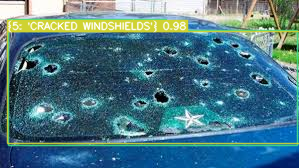

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load the trained model
model_path = 'runs/detect/train6/weights/best.pt'
model = YOLO(model_path)

# Path to the image you want to test
image_path = '/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0642.JPEG'

# Run inference on the image
results = model(image_path)

# Display the results
result_image = results[0].plot(line_width=1)  # Get the image with bounding boxes and labels.Adjust the line_width parameter as needed.
cv2_imshow(result_image)  # Display the image in the notebook


image 1/1 /content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0210.JPEG: 480x640 1 {7: 'HOOD DAMAGES'}, 1 {11: 'HEADLIGHT DAMAGES'}, 171.5ms
Speed: 3.1ms preprocess, 171.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


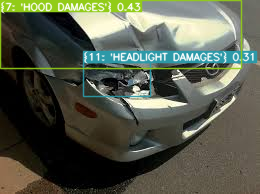

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load the trained model
model_path = 'runs/detect/train6/weights/best.pt'
model = YOLO(model_path)

# Path to the image you want to test
image_path = '/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0210.JPEG'

# Run inference on the image
results = model(image_path)

# Display the results
result_image = results[0].plot(line_width=1)  # Get the image with bounding boxes and labels
cv2_imshow(result_image)  # Display the image in the notebook

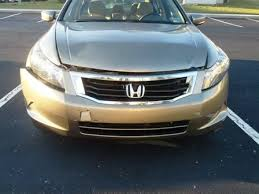


image 1/1 /content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0200.JPEG: 480x640 1 {5: 'CRACKED WINDSHIELDS'}, 1 {7: 'HOOD DAMAGES'}, 320.7ms
Speed: 5.4ms preprocess, 320.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


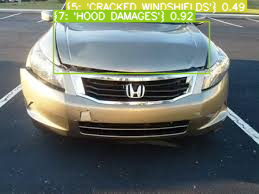

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load the trained model
model_path = 'runs/detect/train6/weights/best.pt'
model = YOLO(model_path)

# Path to the image you want to test
image_path = '/content/gdrive/My Drive/Colab Notebooks/Reva/Capstone/0200.JPEG'

# Display the image to ensure it is correctly loaded
image = cv2.imread(image_path)
cv2_imshow(image)

# Run inference on the image with adjusted confidence threshold
results = model(image_path, conf=0.25)

# Display the results
result_image = results[0].plot(line_width=1)  # Get the image with bounding boxes and labels
cv2_imshow(result_image)  # Display the image in the notebook